# Predicting Covid-19 Status
COVID-19 ML Model using Real Proteomics Data from Centro di Ricerche Applicate Ipazia lab. Unveiling crucial insights from mass spectrometry.

## 1. Problem Definition
> Predict the status of the patient whether he's patient or healthy

## 2. Data
The data are real data coming from the proteomic profiles of over 150 patients using the mass spectrometry device.

## 3. Evaluation
> If we can reach 90% accuracy at predicting whether or not a patient is COVID positive during the proof of concept, we'll pursue the project.

## 4. Features
**Data Dictionary**

- `sample_id`: Unique string identifying each subject
- `target`: 0,  covid; 1, healthy

In [1]:
# Import our tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("./data/covid-data.csv")

In [3]:
df.tail()

,sample_code,target,"(9H-fluoren-9-yl)methanol, O-methoxycarbonyl-","(R*,S*)-2,3-Dihydroxybutanoic acid, tris(trimethylsilyl) deriv.",(Z)-Docos-9-enenitrile,"1-(2,5-Dimethoxyphenyl)-1-[(trimethylsilyl)oxy]propan-2-amine","1,2-Benzenedicarboxylic acid, bis(2-methylpropyl) ester","1,2-Cyclohexanedicarboxylic acid, 2-methylpent-3-yl nonyl ester","1,2-Cyclohexanedicarboxylic acid, nonyl 4-octyl ester","1,2-Ethenediol, 2TMS derivative",...,Glycine,Isonicotinic Acid,Glutamic acid,Glutamine,Proline,Tryptophan,Malic acid,Metanephrine,N-Acetyl-L-alanine,N-Isobutyrylglycine
152,DA 40A,HEALTHY,0.791154,3.837788,1.144782,0.000000,0.000000,0.378937,0.052507,0.147732,...,0.055220,0.048242,0.00000,0.365298,0.000000,0.021268,0.000000,0.190926,0.084806,0.092815
153,DA 41A,HEALTHY,1.393840,1.473728,1.117377,0.000000,0.862353,0.523117,0.000000,0.018715,...,0.012600,0.049414,0.00000,0.288930,0.000000,0.000000,0.002556,0.163818,0.064292,0.046091
154,DA 42A,HEALTHY,0.705892,1.514138,1.480878,0.000000,0.804942,0.605083,0.553704,0.033158,...,0.017962,0.069988,0.00000,1.567022,0.009787,0.000000,0.013898,0.616626,0.084856,0.066720
155,DA 43A,HEALTHY,0.786327,1.190344,1.235491,0.924569,0.210540,1.007049,0.899004,0.062652,...,0.097551,0.080602,0.09514,2.210362,0.076563,5.798763,0.013060,0.027582,0.125990,0.039063
156,DA 44A,HEALTHY,1.574117,14.408578,1.703319,0.000000,0.685623,0.560068,0.265878,0.119766,...,0.016563,0.086217,0.00000,0.481042,0.002130,0.021414,0.012998,0.290614,0.276887,0.019377


In [4]:
# Remove unnecessary columns to predict the cancer before the diagnosis not after 
columns_to_drop = ['sample_code']
df = df.drop(columns=columns_to_drop)

In [5]:
# Transform label text into numbers using hot encoding
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'sex' column
df['target'] = label_encoder.fit_transform(df['target'])

df.tail()

,target,"(9H-fluoren-9-yl)methanol, O-methoxycarbonyl-","(R*,S*)-2,3-Dihydroxybutanoic acid, tris(trimethylsilyl) deriv.",(Z)-Docos-9-enenitrile,"1-(2,5-Dimethoxyphenyl)-1-[(trimethylsilyl)oxy]propan-2-amine","1,2-Benzenedicarboxylic acid, bis(2-methylpropyl) ester","1,2-Cyclohexanedicarboxylic acid, 2-methylpent-3-yl nonyl ester","1,2-Cyclohexanedicarboxylic acid, nonyl 4-octyl ester","1,2-Ethenediol, 2TMS derivative","1,4-Benzenedicarboxylic acid, dimethyl ester",...,Glycine,Isonicotinic Acid,Glutamic acid,Glutamine,Proline,Tryptophan,Malic acid,Metanephrine,N-Acetyl-L-alanine,N-Isobutyrylglycine
152,1,0.791154,3.837788,1.144782,0.000000,0.000000,0.378937,0.052507,0.147732,0.000000,...,0.055220,0.048242,0.00000,0.365298,0.000000,0.021268,0.000000,0.190926,0.084806,0.092815
153,1,1.393840,1.473728,1.117377,0.000000,0.862353,0.523117,0.000000,0.018715,0.191106,...,0.012600,0.049414,0.00000,0.288930,0.000000,0.000000,0.002556,0.163818,0.064292,0.046091
154,1,0.705892,1.514138,1.480878,0.000000,0.804942,0.605083,0.553704,0.033158,0.292873,...,0.017962,0.069988,0.00000,1.567022,0.009787,0.000000,0.013898,0.616626,0.084856,0.066720
155,1,0.786327,1.190344,1.235491,0.924569,0.210540,1.007049,0.899004,0.062652,0.000000,...,0.097551,0.080602,0.09514,2.210362,0.076563,5.798763,0.013060,0.027582,0.125990,0.039063
156,1,1.574117,14.408578,1.703319,0.000000,0.685623,0.560068,0.265878,0.119766,0.000000,...,0.016563,0.086217,0.00000,0.481042,0.002130,0.021414,0.012998,0.290614,0.276887,0.019377


### Data Exploration (exploratory data analysis or EDA)

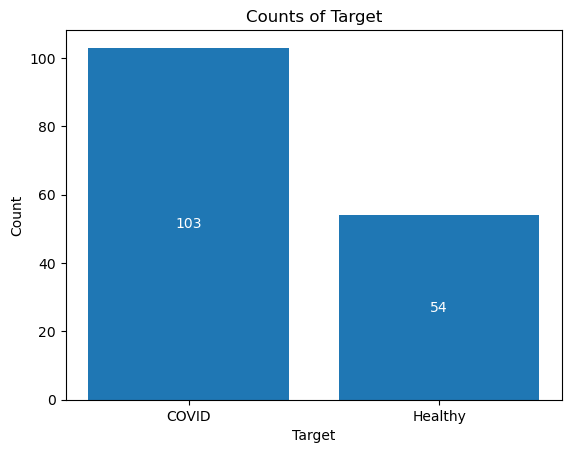

In [6]:
# Calculate value counts
target_counts = df["target"].value_counts()

# Create a bar plot
plt.bar(target_counts.index, target_counts.values)

# Annotate bars with their respective values
for i, count in enumerate(target_counts.values):
    plt.text(target_counts.index[i], count / 2, str(count), ha='center', va='center', color='white')

# Set x-axis tick values as integers
plt.xticks(target_counts.index, ["COVID", "Healthy"])

# Add labels and title
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Counts of Target')

# Show the plot
plt.show()

In [7]:
missing_counts = df.isna().sum()
# check if there are missing values
for column, count in missing_counts.items():
    if (count != 0):
        print(column)

In [8]:
df.shape

(157, 252)

## 5. Modeling

In [9]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC

In [12]:
X = df.drop(columns=["target"])
y = df["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [13]:
print("Training set class distribution:")
print(y_train.value_counts())

print("\nTest set class distribution:")
print(y_test.value_counts())

Training set class distribution:
target
0    82
1    43
Name: count, dtype: int64

Test set class distribution:
target
0    21
1    11
Name: count, dtype: int64


In [97]:
X

,"(9H-fluoren-9-yl)methanol, O-methoxycarbonyl-","(R*,S*)-2,3-Dihydroxybutanoic acid, tris(trimethylsilyl) deriv.",(Z)-Docos-9-enenitrile,"1-(2,5-Dimethoxyphenyl)-1-[(trimethylsilyl)oxy]propan-2-amine","1,2-Benzenedicarboxylic acid, bis(2-methylpropyl) ester","1,2-Cyclohexanedicarboxylic acid, 2-methylpent-3-yl nonyl ester","1,2-Cyclohexanedicarboxylic acid, nonyl 4-octyl ester","1,2-Ethenediol, 2TMS derivative","1,4-Benzenedicarboxylic acid, dimethyl ester","1,5-Anhydroglucitol, 4TMS derivative",...,Glycine,Isonicotinic Acid,Glutamic acid,Glutamine,Proline,Tryptophan,Malic acid,Metanephrine,N-Acetyl-L-alanine,N-Isobutyrylglycine
0,0.883964,1.332159,0.351471,0.000000,0.280122,0.850463,1.331854,1.200931,1.704587,0.892307,...,0.249980,0.045225,0.000000,1.324795,0.000000,0.000000,0.000000,0.000000,0.128811,0.000000
1,0.903879,2.172085,1.243110,0.474183,0.331635,1.230538,0.000000,1.750075,0.832466,1.011035,...,0.000000,0.724837,4.245869,15.159300,4.132975,192.678619,0.203506,0.000000,1.071052,0.000000
2,0.832027,2.892255,1.151473,0.608532,0.411522,0.688556,0.618605,0.717614,2.347750,1.080220,...,0.000000,0.056698,0.000000,0.834101,0.004172,8.813582,0.032787,0.000000,0.158483,0.000000
3,0.651488,11.418937,2.374329,0.040055,0.440903,2.973854,0.407457,2.993844,2.026716,1.394858,...,0.000000,0.054399,0.000000,0.263694,0.000000,11.490274,0.000000,0.000000,0.146090,0.000000
4,0.880122,0.778976,1.773939,0.961688,0.376916,0.944356,0.000000,1.384626,2.325217,1.125676,...,0.000000,0.051032,3.598164,1.301579,0.971491,3.478587,0.092540,0.000000,0.102110,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,0.791154,3.837788,1.144782,0.000000,0.000000,0.378937,0.052507,0.147732,0.000000,0.440694,...,0.055220,0.048242,0.000000,0.365298,0.000000,0.021268,0.000000,0.190926,0.084806,0.092815
153,1.393840,1.473728,1.117377,0.000000,0.862353,0.523117,0.000000,0.018715,0.191106,0.906337,...,0.012600,0.049414,0.000000,0.288930,0.000000,0.000000,0.002556,0.163818,0.064292,0.046091
154,0.705892,1.514138,1.480878,0.000000,0.804942,0.605083,0.553704,0.033158,0.292873,1.164281,...,0.017962,0.069988,0.000000,1.567022,0.009787,0.000000,0.013898,0.616626,0.084856,0.066720
155,0.786327,1.190344,1.235491,0.924569,0.210540,1.007049,0.899004,0.062652,0.000000,0.826914,...,0.097551,0.080602,0.095140,2.210362,0.076563,5.798763,0.013060,0.027582,0.125990,0.039063


In [98]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(max_iter=100000),
          "SVC": SVC(),
          "Random Forest Classifier": RandomForestClassifier(),
         "Linear SVC": LinearSVC(dual="auto", max_iter=100000)}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [99]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

D:\Work\machine-learning\covid-estimator\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Work\machine-learning\covid-estimator\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


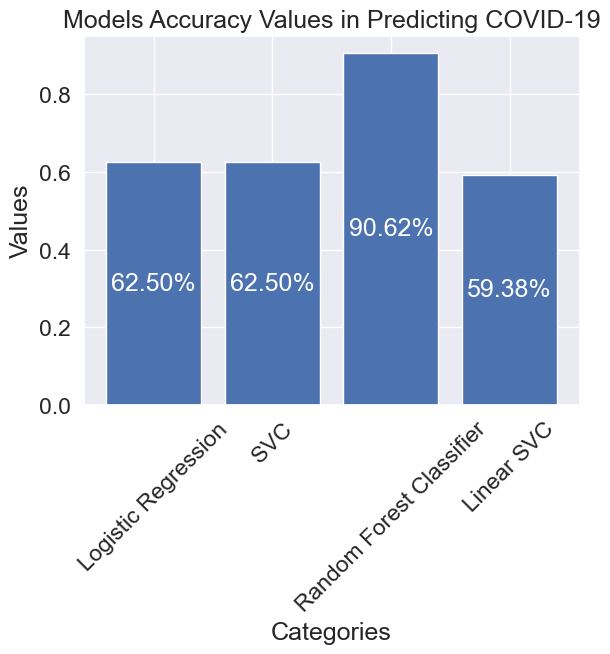

In [100]:
# Extract keys and values from the dictionary
categories = list(model_scores.keys())
values = list(model_scores.values())

# Create a bar plot
plt.bar(categories, values)

# Annotate bars with their respective values in the middle with white text
for i, value in enumerate(values):
    plt.text(categories[i], value / 2, f'{value * 100:.2f}%', ha='center', va='center', color='white')


# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Models Accuracy Values in Predicting COVID-19')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [101]:
highest_accuracy = 0
best_model = ""

for model, accuracy in model_scores.items():
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        best_model = model

print(f"The highest accuracy value is {f'{highest_accuracy * 100:.2f}%'} from the {best_model}.")

The highest accuracy value is 90.62% from the Random Forest Classifier.


In [102]:
df.shape

(157, 252)

### Hyperparameter tuning with RandomizedSearchCV

In [103]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

clf = RandomForestClassifier(random_state=42)

rf_grid = {"n_estimators": np.arange(1000, 1500, 2000),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

# Perform Randomized Search
rs_rf = RandomizedSearchCV(clf, param_distributions=rf_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
rs_rf.fit(X_train, y_train)

print("Best Hyperparameters for Random Forest Classifier:", rs_rf.best_params_)
print("Best Score for Random Forest Classifier:", f'{rs_rf.best_score_ * 100:.2f}%')

Best Hyperparameters for Random Forest Classifier: {'n_estimators': 1000, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_depth': 10}
Best Score for Random Forest Classifier: 85.60%


> The tuned model didn't increase the accuracy of the base model so I will not use it later

### Evaluating our BASE machine learning model beyond accuracy

- AUC score
- Confusion matrix
- Classification report
- Precision
- Recall
- F1 score

In [104]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score, roc_curve

**1. AUC Score**

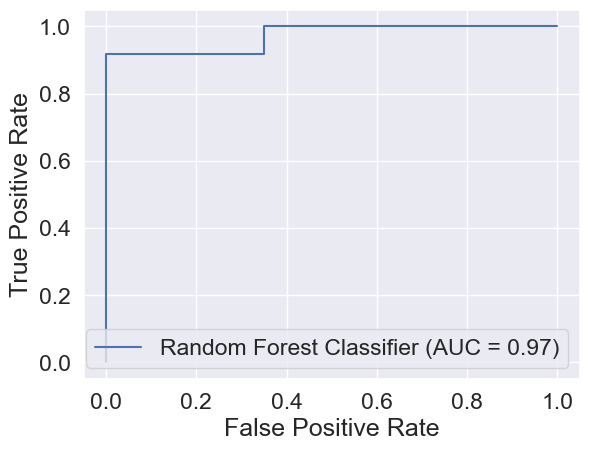

In [105]:
# Make prediction with base model
classifier = models["Random Forest Classifier"]

# Predict probabilities for the positive class
y_pred_prob = classifier.predict_proba(X_test)[:, 1]

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Create the RocCurveDisplay object
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_score, estimator_name='Random Forest Classifier')

# Plot ROC curve
roc_display.plot()
plt.show()

**2. Confusion Matrix**

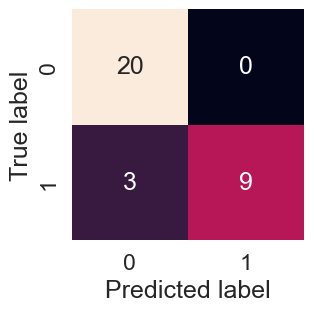

In [106]:
y_preds = classifier.predict(X_test)

sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

**3. Classification Report**

In [107]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        20
           1       1.00      0.75      0.86        12

    accuracy                           0.91        32
   macro avg       0.93      0.88      0.89        32
weighted avg       0.92      0.91      0.90        32



**4. precision**

**5. recall**

**6. f1**

In [108]:
y_preds = classifier.predict(X_test)

# Calculate precision
precision = precision_score(y_test, y_preds)

# Calculate recall
recall = recall_score(y_test, y_preds)

# Calculate F1 Score
f1 = f1_score(y_test, y_preds)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Accuracy: 0.59375
Precision: 1.0
Recall: 0.75
F1: 0.8571428571428571


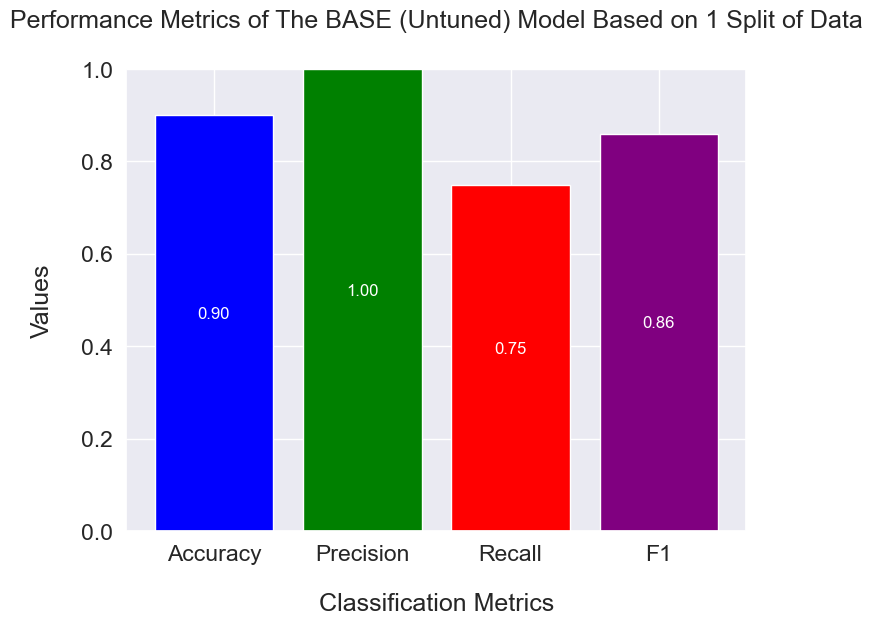

In [109]:
# Values for accuracy, precision, recall, and F1 score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
values = [0.90, 1.0, 0.75, 0.86]

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Classification Metrics', labelpad=20)
plt.ylabel('Values', labelpad=20)
plt.title('Performance Metrics of The BASE (Untuned) Model Based on 1 Split of Data', pad=30)
plt.ylim(0, 1)  # Set the y-axis limits to the range [0, 1] for better visualization

# Annotate the bars with their respective values in the center
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height()/2 + 0.01, f'{value:.2f}', ha='center', fontsize=12, color='white')

plt.show()

## Feature Importance - mean decrease in impurity

C:\Users\Mark Maksi\AppData\Local\Temp\ipykernel_2116\2156711015.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


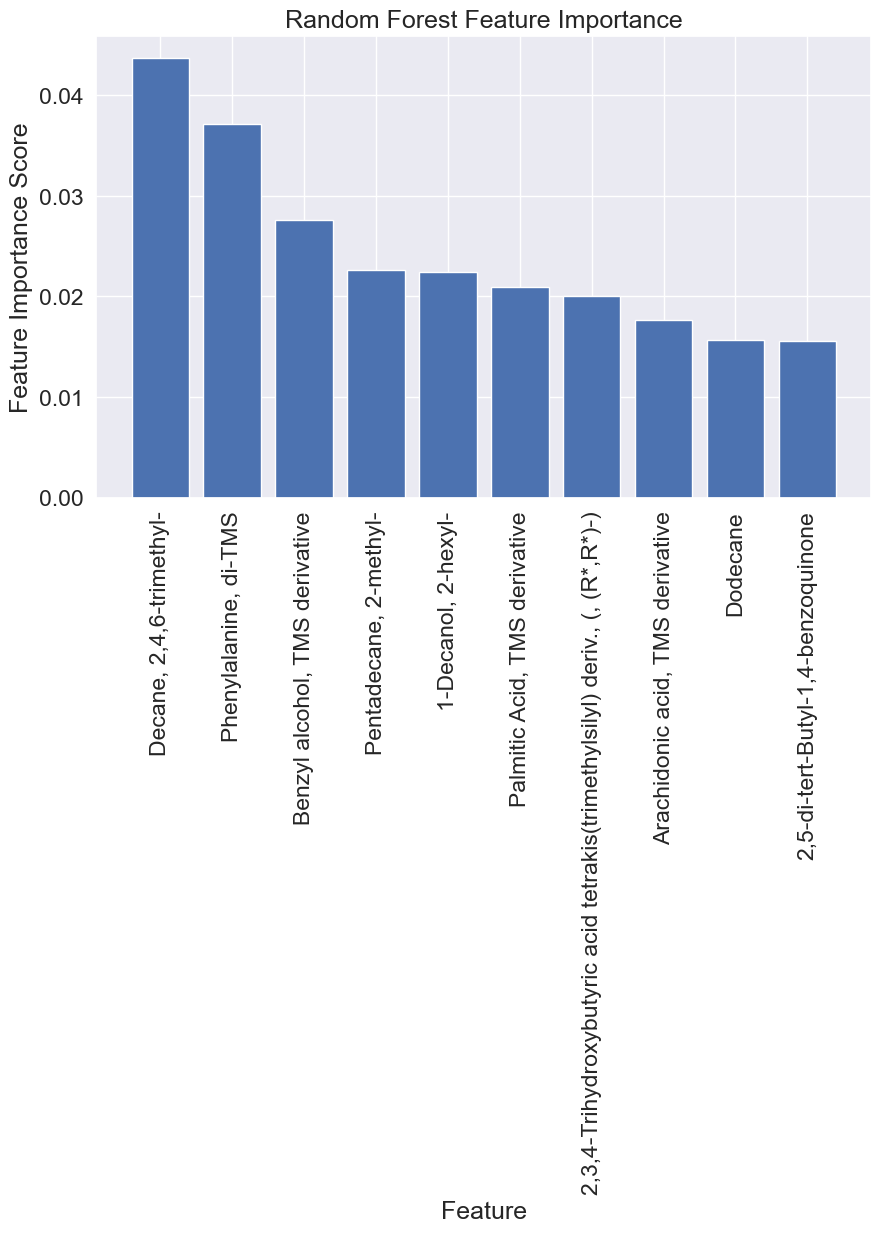

In [110]:
feature_importance_scores = classifier.feature_importances_

# Get the feature names (assuming you have them in a list)
feature_names = X

# Sort feature importance scores and feature names together
sorted_importance = sorted(zip(feature_importance_scores, feature_names), reverse=True)

# Separate sorted scores and names
sorted_scores, sorted_names = zip(*sorted_importance)

# Create a bar plot of feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(10), sorted_scores[:10], tick_label=sorted_names[:10])
plt.xlabel('Feature')
plt.ylabel('Feature Importance Score')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Feature Importance - feature permutation

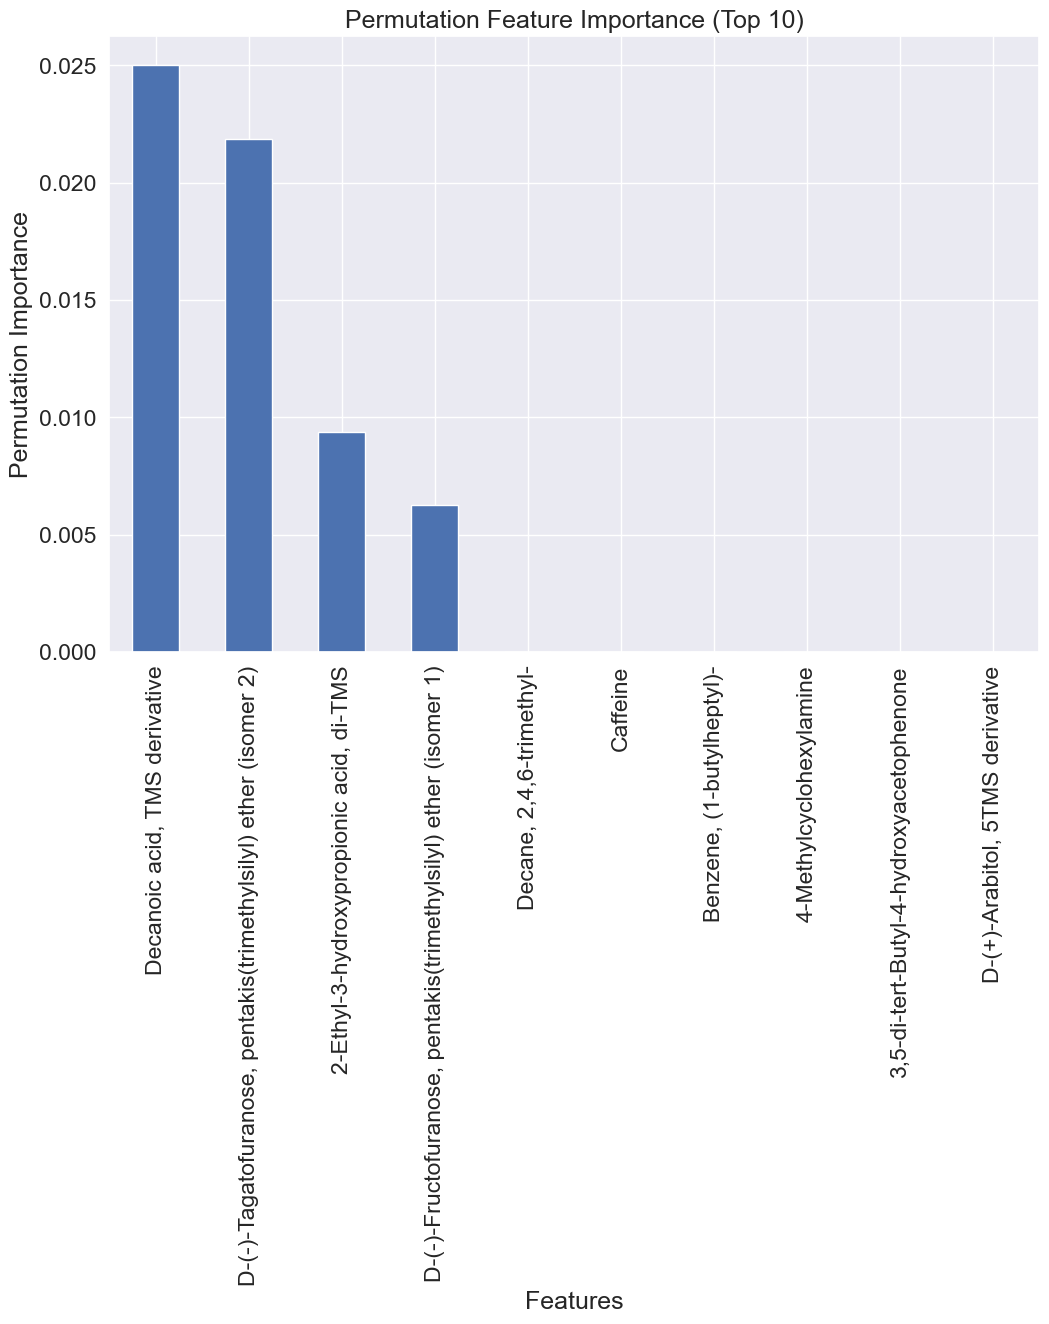

In [122]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    classifier, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

forest_importances = pd.Series(result.importances_mean, index=np.array(sorted_names[:251]))

forest_importances_sorted = forest_importances.sort_values(ascending=False)[:10]  # Sort in descending order

plt.figure(figsize=(12, 8))
forest_importances_sorted.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Permutation Importance')
plt.title('Permutation Feature Importance (Top 10)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

## Training a New Model After Doing Features Reduction

In [81]:
# Choose only the most important features
selected_features = np.array(sorted_names[:70])
X = df[selected_features]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the model
classifier = models["Random Forest Classifier"]

scores = []
for _ in range(20):
    # Fit the classifier to the training data (assuming you need to do this)
    classifier.fit(X_train, y_train)
    
    # Calculate the score on the test data and append it to the scores list
    score = classifier.score(X_test, y_test)
    scores.append(score)

# Calculate and print the mean score
mean_score = sum(scores) / len(scores)
mean_score

0.921875

In [84]:
y_preds = classifier.predict(X_test)

precision_scores = []
recall_scores = []
f1_scores = []
for _ in range(20):
    # Calculate precision
    precision = precision_score(y_test, y_preds)
    precision_scores.append(precision)

    # Calculate recall
    recall = recall_score(y_test, y_preds)
    recall_scores.append(recall)

    # Calculate F1 Score
    f1 = f1_score(y_test, y_preds)
    f1_scores.append(f1)
    
mean_precision = sum(precision_scores) / len(precision_scores)
mean_recall = sum(recall_scores) / len(recall_scores)
mean_f1 = sum(f1_scores) / len(f1_scores)

print("Accuracy:", mean_score)
print("Precision:", mean_precision)
print("Recall:", mean_recall)
print("F1:", mean_f1)

Accuracy: 0.921875
Precision: 1.0
Recall: 0.8333333333333336
F1: 0.9090909090909088


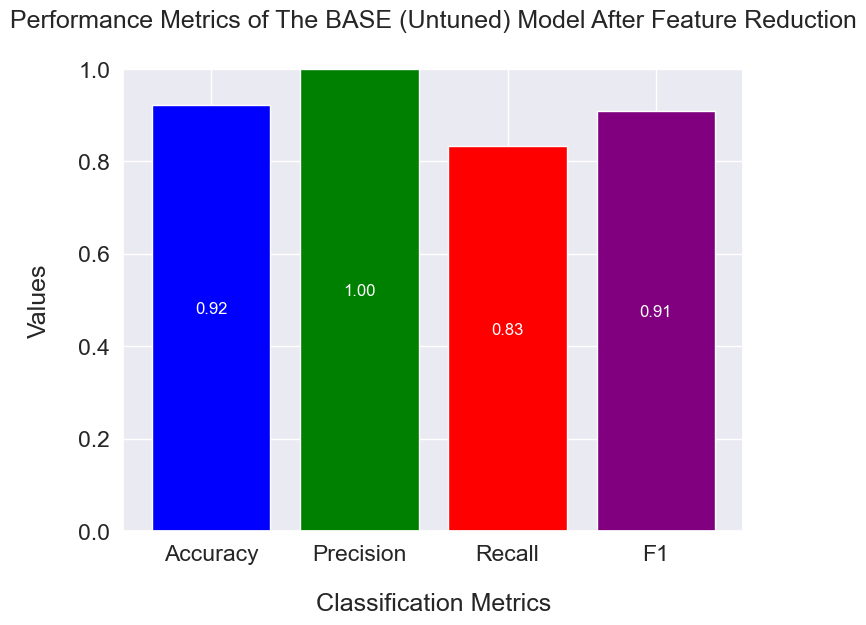

In [85]:
# Values for accuracy, precision, recall, and F1 score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
values = [mean_score, mean_precision, mean_recall, mean_f1]

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Classification Metrics', labelpad=20)
plt.ylabel('Values', labelpad=20)
plt.title('Performance Metrics of The BASE (Untuned) Model After Feature Reduction', pad=30)
plt.ylim(0, 1)  # Set the y-axis limits to the range [0, 1] for better visualization

# Annotate the bars with their respective values in the center
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height()/2 + 0.01, f'{value:.2f}', ha='center', fontsize=12, color='white')

plt.show()

**4. Cross validated accuracy**

In [47]:
# Base model
cv_score = cross_val_score(classifier, X, y, cv=5, scoring='accuracy')
cv_acc_base = np.mean(cv_score)
cv_acc_base

0.704233870967742

In [48]:
# Hypertuned model using RandomizedSearchCV tuned with best parameters
clf = RandomForestClassifier(n_estimators=1000, min_samples_split=6, min_samples_leaf=1, max_depth=10)
cv_score = cross_val_score(clf, X, y, cv=5, scoring='accuracy', )
cv_acc = np.mean(cv_score)
cv_acc

0.704233870967742

**5. Cross validated precision**

In [49]:
# Base model
cv_score = cross_val_score(classifier, X, y, cv=5, scoring='precision')
cv_precision_base = np.mean(cv_score)
cv_precision_base

0.7089133089133088

In [ ]:
# Hypertuned model using RandomizedSearchCV tuned with best parameters
cv_score = cross_val_score(clf, X, y, cv=5, scoring='precision')
cv_precision = np.mean(cv_score)
cv_precision

**6. Cross validated recall**

In [ ]:
# Base model
cv_score = cross_val_score(classifier, X, y, cv=5, scoring='recall')
cv_recall_base = np.mean(cv_score)
cv_recall_base

In [ ]:
# Hypertuned model using RandomizedSearchCV tuned with best parameters
cv_score = cross_val_score(clf, X, y, cv=5, scoring='recall')
cv_recall = np.mean(cv_score)
cv_recall

**7. Cross validated f1**

In [ ]:
# Base model
cv_score = cross_val_score(classifier, X, y, cv=5, scoring='f1')
cv_f1_base = np.mean(cv_score)
cv_f1_base

In [ ]:
# Hypertuned model using RandomizedSearchCV tuned with best parameters
cv_score = cross_val_score(clf, X, y, cv=5, scoring='f1')
cv_f1 = np.mean(cv_score)
cv_f1

### Evaluating our TUNED machine learning model beyond accuracy

- AUC score
- Confusion matrix
- Classification report
- Precision
- Recall
- F1 score

**TUNED Model (rs_rf) Parameters**

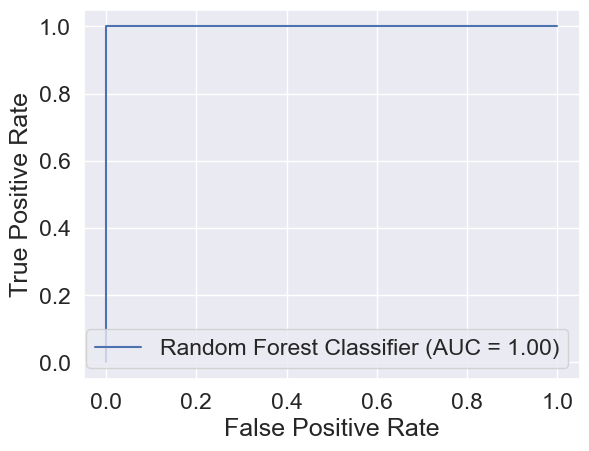

In [39]:
# Predict probabilities for the positive class
y_pred_prob = rs_rf.predict_proba(X_test)[:, 1]

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Create the RocCurveDisplay object
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_score, estimator_name='Random Forest Classifier')

# Plot ROC curve
roc_display.plot()
plt.show()

**Comparison of Cross Validated Metrics: Base Model vs. RandomSearch-Tuned Model Based on 5 Splits**

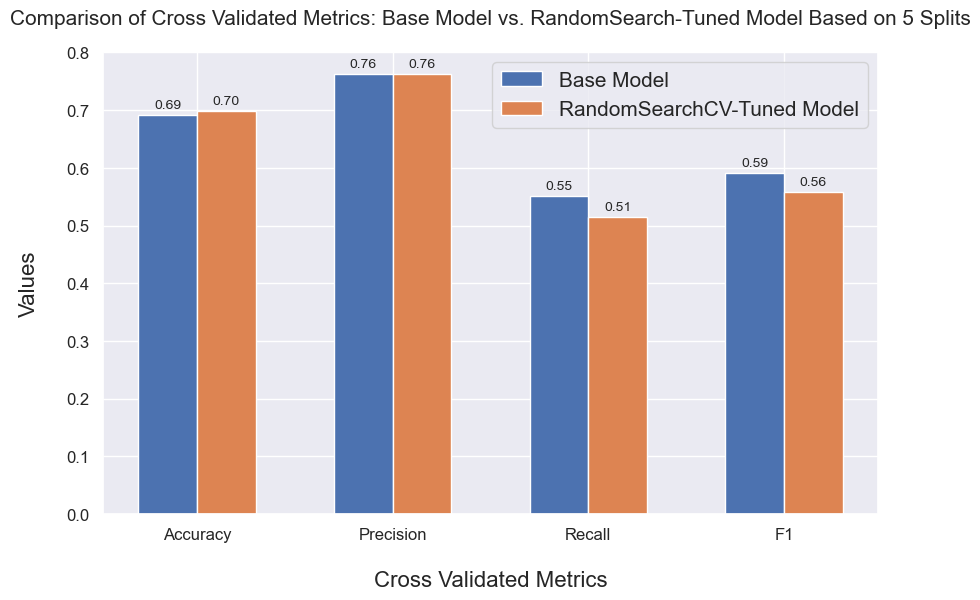

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Data for two bar charts
categories = ['Accuracy', 'Precision', 'Recall', 'F1']
values1 = [cv_acc_base, cv_precision_base, cv_recall_base, cv_f1_base]
values2 = [cv_acc, cv_precision, cv_recall, cv_f1]

# Create side-by-side bar charts
width = 0.30
x = np.arange(len(categories))

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, values1, width, label='Base Model')
rects2 = ax.bar(x + width/2, values2, width, label='RandomSearchCV-Tuned Model')

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend(fontsize='small')
ax.set_xlabel('Cross Validated Metrics', fontsize=16, labelpad=20)
ax.set_ylabel('Values', fontsize=16, labelpad=20)
ax.set_title('Comparison of Cross Validated Metrics: Base Model vs. RandomSearch-Tuned Model Based on 5 Splits', fontsize=15, pad=20)

# Annotate the bars with their values in the center
for bar in rects1 + rects2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',  # Format the value to two decimal places
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset for better alignment
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

plt.show()

In [31]:
base_accuracy = classifier.score(X_test, y_test) * 100
tuned_accuracy = cross_val_score(classifier, X, y, cv=5, scoring='accuracy')

In [32]:
tuned_accuracy.mean()

0.6977822580645162

In [33]:
base_accuracy

90.625